# Importing libraries

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Dataset

In [10]:
# Load Trainning dataset
dataset = pd.read_csv('../input/digit-recognizer/train.csv')

In [11]:
# check dataset
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting Data into X_train and Y_train

In [12]:
# Split features and labels
X_train = np.array(dataset.drop(['label'],axis=1))
Y_train = np.array(dataset['label'])

In [13]:
# summarize dataset shape
print('Shape:', X_train.shape, Y_train.shape)
# summarize pixel values
print('Pixel values:', X_train.min(), X_train.max(), X_train.mean(), X_train.std())

NameError: name 'train_images' is not defined

In [7]:
# check labels
Y_train

array([1, 0, 1, ..., 7, 6, 9])

# Applying Normalization

In [9]:

X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_train = X_train.astype('float32')/255
X_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

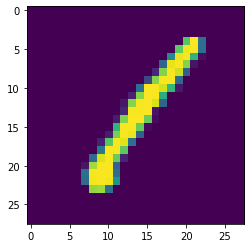

In [8]:
plt.figure()
plt.imshow(X_train[0][:,:,0])

# Building Model

In [9]:
import tensorflow as tf

In [10]:
X_train.shape

(42000, 28, 28, 1)

In [11]:
# Convolutional Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [12]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )

# Training the model

In [13]:
model.fit(X_train,Y_train,epochs=15,batch_size=32)

Epoch 1/15
1313/1313 [==============================] - 25s 19ms/step - loss: 0.2036 - accuracy: 0.9348
Epoch 2/15
1313/1313 [==============================] - 24s 19ms/step - loss: 0.0617 - accuracy: 0.9813
Epoch 3/15
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0478 - accuracy: 0.9854
Epoch 4/15
1313/1313 [==============================] - 24s 19ms/step - loss: 0.0370 - accuracy: 0.9886
Epoch 5/15
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0323 - accuracy: 0.9901
Epoch 6/15
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0280 - accuracy: 0.9911
Epoch 7/15
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0247 - accuracy: 0.9920
Epoch 8/15
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0204 - accuracy: 0.9929
Epoch 9/15
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0198 - accuracy: 0.9936
Epoch 10/15
1313/1313 [==============================] - 25s 19m

# Using trained model to predict test dataset

In [14]:
test_df=pd.read_csv('../input/digit-recognizer/test.csv')

In [15]:
X_test=np.array(test_df)

In [16]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [17]:
X_test=X_test.astype('float32')

In [18]:
X_test/=255

In [19]:
predictions=model.predict(X_test)

In [20]:
predictions[0]

array([2.1316992e-16, 7.4338398e-15, 1.0000000e+00, 9.0388763e-14,
       4.7742339e-13, 3.9777236e-17, 1.2451952e-14, 2.1900947e-12,
       4.2198533e-15, 4.6783341e-15], dtype=float32)

In [21]:
np.argmax(predictions[10])

5

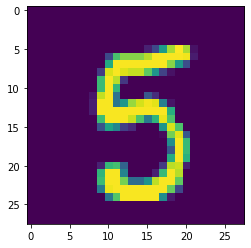

In [22]:
plt.figure()
plt.imshow(X_test[10][:,:,0])

In [23]:
X_test.shape

(28000, 28, 28, 1)

In [24]:
predictions.shape

(28000, 10)

In [25]:
results=[]

In [26]:
for i in range(28000):
    results.append(np.argmax(predictions[i]))
    

In [27]:
results[4]

3

In [28]:
results=pd.Series(results,name="Label")

In [29]:
results

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [30]:
submission=pd.concat([pd.Series(range(1,28001),name="ImageId"),results],axis=1)

In [31]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


# Making Submission

In [32]:
submission.to_csv('My_submissions3',index=False)

In [33]:
my_sub=pd.read_csv('My_submissions3')

In [34]:
my_sub

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
